In [2]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import matplotlib.pyplot as plt

In [4]:
df= pd.read_csv('train.csv')

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
df.info() #check data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
#check missing values
df.isnull().sum()[df.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [10]:
for col in df.columns:
    if df[col].isnull().sum()>0:
        print(col,df[col].dtype,df[col].isnull().sum())

LotFrontage float64 259
Alley object 1369
MasVnrType object 872
MasVnrArea float64 8
BsmtQual object 37
BsmtCond object 37
BsmtExposure object 38
BsmtFinType1 object 37
BsmtFinType2 object 38
Electrical object 1
FireplaceQu object 690
GarageType object 81
GarageYrBlt float64 81
GarageFinish object 81
GarageQual object 81
GarageCond object 81
PoolQC object 1453
Fence object 1179
MiscFeature object 1406


In [11]:
df.groupby('Alley',dropna=False)['SalePrice'].mean()

Alley
Grvl    122219.080000
Pave    168000.585366
NaN     183452.131483
Name: SalePrice, dtype: float64

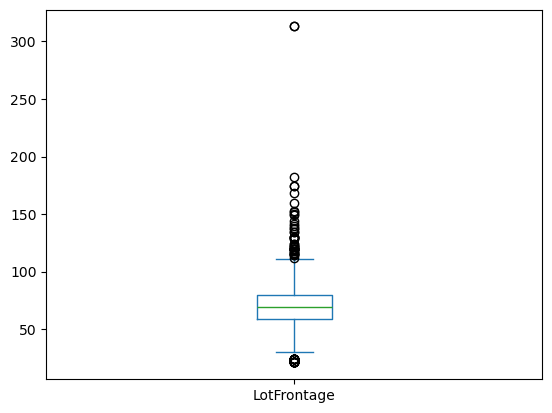

In [12]:
#LotFrontage
df['LotFrontage'].plot(kind='box')
plt.show()

In [13]:
df.shape

(1460, 81)

In [14]:
##Iteration1: removing all features with missing values

cols = df.columns[~df.isnull().any()]

In [15]:
df1 = df[cols]

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   LotShape       1460 non-null   object
 6   LandContour    1460 non-null   object
 7   Utilities      1460 non-null   object
 8   LotConfig      1460 non-null   object
 9   LandSlope      1460 non-null   object
 10  Neighborhood   1460 non-null   object
 11  Condition1     1460 non-null   object
 12  Condition2     1460 non-null   object
 13  BldgType       1460 non-null   object
 14  HouseStyle     1460 non-null   object
 15  OverallQual    1460 non-null   int64 
 16  OverallCond    1460 non-null   int64 
 17  YearBuilt      1460 non-null   int64 
 18  YearRemodAdd   1460 non-null

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()

In [19]:
pd.Series(le.fit_transform(df1['MSZoning'])).unique()

array([3, 4, 0, 1, 2])

In [20]:
#encoding categorical variables

for col in df1.select_dtypes('object'):
    df1.loc[:,col] = le.fit_transform(df1[col])

In [21]:
df1.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   LotShape       1460 non-null   object
 6   LandContour    1460 non-null   object
 7   Utilities      1460 non-null   object
 8   LotConfig      1460 non-null   object
 9   LandSlope      1460 non-null   object
 10  Neighborhood   1460 non-null   object
 11  Condition1     1460 non-null   object
 12  Condition2     1460 non-null   object
 13  BldgType       1460 non-null   object
 14  HouseStyle     1460 non-null   object
 15  OverallQual    1460 non-null   int64 
 16  OverallCond    1460 non-null   int64 
 17  YearBuilt      1460 non-null   int64 
 18  YearRemodAdd   1460 non-null

In [23]:
for col in df1.select_dtypes('object'):
    print(col,df1[col].unique(),end="\n------------\n")

MSZoning [3 4 0 1 2]
------------
Street [1 0]
------------
LotShape [3 0 1 2]
------------
LandContour [3 0 2 1]
------------
Utilities [0 1]
------------
LotConfig [4 2 0 1 3]
------------
LandSlope [0 1 2]
------------
Neighborhood [5 24 6 15 11 21 14 17 3 19 16 12 20 9 10 7 23 8 22 4 13 0 2 18 1]
------------
Condition1 [2 1 4 0 5 8 6 3 7]
------------
Condition2 [2 0 7 1 4 3 6 5]
------------
BldgType [0 1 2 4 3]
------------
HouseStyle [5 2 0 1 6 7 4 3]
------------
RoofStyle [1 3 2 4 0 5]
------------
RoofMatl [1 7 3 6 2 5 4 0]
------------
Exterior1st [12 8 13 6 3 14 5 9 0 11 2 1 10 7 4]
------------
Exterior2nd [13 8 15 6 10 14 5 3 12 0 2 7 1 11 9 4]
------------
ExterQual [2 3 0 1]
------------
ExterCond [4 2 1 3 0]
------------
Foundation [2 1 0 5 3 4]
------------
Heating [1 2 3 5 4 0]
------------
HeatingQC [0 2 4 1 3]
------------
CentralAir [1 0]
------------
KitchenQual [2 3 0 1]
------------
Functional [6 2 0 3 4 1 5]
------------
PavedDrive [2 0 1]
------------
SaleTy

In [24]:
for col in df1.select_dtypes('object'):
    df1[col] = df1.loc[:,col].astype(int)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17156\2405799989.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = df1.loc[:,col].astype(int)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17156\2405799989.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = df1.loc[:,col].astype(int)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17156\2405799989.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [25]:
# df1["MSZoning"] = df1["MSZoning"].astype(int)

In [26]:
df1.loc[:,"Street"] = df1.loc[:,"Street"].astype(float)

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   MSZoning       1460 non-null   int32
 3   LotArea        1460 non-null   int64
 4   Street         1460 non-null   int32
 5   LotShape       1460 non-null   int32
 6   LandContour    1460 non-null   int32
 7   Utilities      1460 non-null   int32
 8   LotConfig      1460 non-null   int32
 9   LandSlope      1460 non-null   int32
 10  Neighborhood   1460 non-null   int32
 11  Condition1     1460 non-null   int32
 12  Condition2     1460 non-null   int32
 13  BldgType       1460 non-null   int32
 14  HouseStyle     1460 non-null   int32
 15  OverallQual    1460 non-null   int64
 16  OverallCond    1460 non-null   int64
 17  YearBuilt      1460 non-null   int64
 18  YearRemodAdd   1460 non-null   int64
 19  RoofSt

In [28]:
import seaborn as sns

In [29]:
df1.corr()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.011156,-0.006096,-0.033226,0.008916,0.032122,-0.019659,0.013324,0.049756,0.005847,...,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,0.019773,-0.005806,-0.021917
MSSubClass,0.011156,1.000000,0.035900,-0.139781,-0.024969,0.119289,-0.002940,-0.022844,0.075910,-0.025672,...,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,0.012464,-0.024940,-0.084284
MSZoning,-0.006096,0.035900,1.000000,-0.034452,0.087654,0.061887,-0.017854,-0.001192,-0.009895,-0.022055,...,0.115509,0.000362,0.019089,-0.003128,0.009293,-0.031496,-0.020628,0.097437,0.009494,-0.166872
LotArea,-0.033226,-0.139781,-0.034452,1.000000,-0.197131,-0.165315,-0.149083,0.010123,-0.121161,0.436868,...,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.012292,0.034169,0.263843
Street,0.008916,-0.024969,0.087654,-0.197131,1.000000,-0.010224,0.115995,0.001682,0.013960,-0.179360,...,0.023082,0.007473,-0.033160,0.004413,-0.022733,0.003690,-0.025043,0.014339,0.006064,0.041036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,0.021172,-0.013585,-0.031496,0.001205,0.003690,-0.033455,-0.011599,-0.051552,0.018902,0.007072,...,-0.028887,0.029474,0.023217,-0.033737,-0.006495,1.000000,-0.145721,-0.047386,0.013320,0.046432
YrSold,0.000712,-0.021407,-0.020628,-0.014261,-0.025043,0.036449,0.020507,0.023353,-0.005992,-0.002305,...,-0.009916,0.018645,0.010694,-0.059689,0.004906,-0.145721,1.000000,-0.002327,0.003880,-0.028923
SaleType,0.019773,0.012464,0.097437,0.012292,0.014339,-0.000911,-0.025754,-0.126770,0.014325,0.054858,...,-0.016731,-0.009034,0.004533,0.011009,0.015773,-0.047386,-0.002327,1.000000,0.184067,-0.054911
SaleCondition,-0.005806,-0.024940,0.009494,0.034169,0.006064,-0.038118,0.033809,-0.089701,0.051579,-0.043095,...,-0.098388,0.004379,-0.020095,-0.067251,0.013027,0.013320,0.003880,0.184067,1.000000,0.213092


<Axes: >

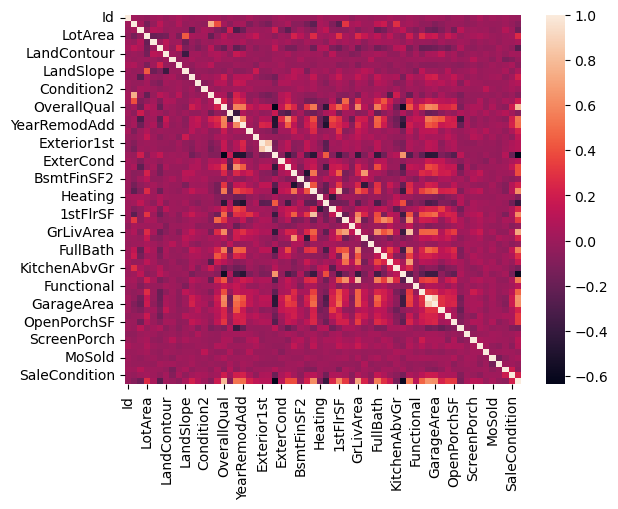

In [30]:
sns.heatmap(df1.corr())

In [31]:
df1.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000


In [32]:
df1 = df1.drop(columns='Id')

In [33]:
df1.shape

(1460, 61)

In [34]:
df1.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,8450,1,3,3,0,4,0,5,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,9600,1,3,3,0,2,0,24,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,11250,1,0,3,0,4,0,5,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,9550,1,0,3,0,0,0,6,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,14260,1,0,3,0,2,0,15,...,0,0,0,0,0,12,2008,8,4,250000


In [35]:
df1[['MSSubClass','SalePrice']].corr()

,MSSubClass,SalePrice
MSSubClass,1.000000,-0.084284
SalePrice,-0.084284,1.000000


In [36]:
for col in df1.columns:
    print(df1[[col,'SalePrice']].corr())
    print()

            MSSubClass  SalePrice
MSSubClass    1.000000  -0.084284
SalePrice    -0.084284   1.000000

           MSZoning  SalePrice
MSZoning   1.000000  -0.166872
SalePrice -0.166872   1.000000

            LotArea  SalePrice
LotArea    1.000000   0.263843
SalePrice  0.263843   1.000000

             Street  SalePrice
Street     1.000000   0.041036
SalePrice  0.041036   1.000000

           LotShape  SalePrice
LotShape    1.00000   -0.25558
SalePrice  -0.25558    1.00000

             LandContour  SalePrice
LandContour     1.000000   0.015453
SalePrice       0.015453   1.000000

           Utilities  SalePrice
Utilities   1.000000  -0.014314
SalePrice  -0.014314   1.000000

           LotConfig  SalePrice
LotConfig   1.000000  -0.067396
SalePrice  -0.067396   1.000000

           LandSlope  SalePrice
LandSlope   1.000000   0.051152
SalePrice   0.051152   1.000000

              Neighborhood  SalePrice
Neighborhood      1.000000   0.210851
SalePrice         0.210851   1.000000

      

In [37]:
#splitting the data

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X = df1.drop(columns="SalePrice")
y = df1['SalePrice']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1168, 60)
(1168,)
(292, 60)
(292,)


In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lin_reg = LinearRegression()

In [44]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [45]:
print(lin_reg.score(X_train,y_train)) #r2 score on training data
print(lin_reg.score(X_test,y_test))

0.8325342601965208
0.8428724220021484


In [46]:
lin_reg.predict(X_test)

array([156873.32386893, 304683.30495377, 112747.66224854, 174117.9540156 ,
       311827.65797424,  48943.46899289, 231909.23360288, 136605.87757627,
        48913.63290125, 152566.95536738, 153345.63264517, 112540.04651597,
        82945.26206527, 214231.67470176, 165785.81671664, 142052.55047464,
       216527.68213404, 125824.75438721, 118587.13804409, 230552.77502261,
       154303.56815303, 215070.88644037, 192876.46241118, 125941.88952645,
       212142.98591163, 162856.77256761, 205046.10534975,  85827.61687909,
       170527.09447048, 188524.05960732, 140741.0721584 , 267576.58989571,
       210344.17175877,  95598.03634453, 267325.97371272, 156505.18231219,
       130036.80789369, 217968.59349815, 300830.47691133,  96028.31392711,
       119890.23294796, 256545.99549988, 110064.32368889, 314607.59361486,
       137782.99067528, 154537.84538642,  97511.83939404, 134181.37529117,
       383812.58683124, 128897.64448393, 109683.03484418, 231932.04500069,
        94833.76584361, 3

In [47]:
y_test.reset_index(drop=True)

0      154500
1      325000
2      115000
3      159000
4      315500
        ...  
287     89471
288    260000
289    189000
290    108000
291    124500
Name: SalePrice, Length: 292, dtype: int64

In [48]:
pd.Series(lin_reg.predict(X_test))

0      156873.323869
1      304683.304954
2      112747.662249
3      174117.954016
4      311827.657974
           ...      
287    109705.743490
288    267349.952394
289    211320.937380
290    107944.245119
291    100586.165979
Length: 292, dtype: float64

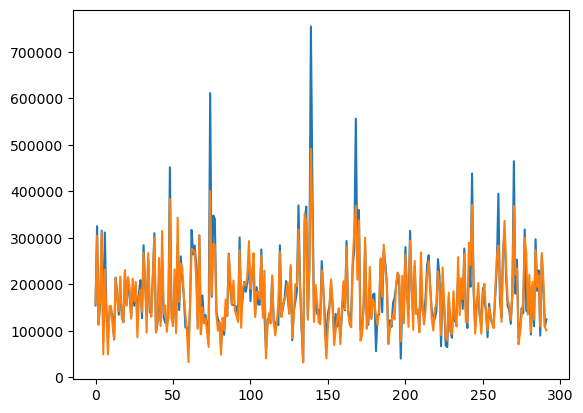

In [49]:
plt.plot(y_test.reset_index(drop=True))
plt.plot(pd.Series(lin_reg.predict(X_test)))

In [52]:
test_file= pd.read_csv('test.csv')

In [53]:
test_file.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [54]:
test_file.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [55]:
cols2 = cols.copy()

In [56]:
cols2 = list(cols2)

In [57]:
cols2.pop()

'SalePrice'

In [58]:
test_file = test_file[cols2] 

In [59]:
Id = test_file['Id']

In [60]:
test_file.drop(columns="Id",inplace=True)

In [61]:
test_file.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,...,82,0,0,144,0,0,1,2010,WD,Normal


In [62]:
cols_mis = test_file.isnull().sum()[test_file.isnull().sum()>0].keys()

In [63]:
for col in cols_mis:
    if test_file[col].dtype == 'object':
        test_file[col]=test_file[col].fillna(test_file[col].mode()[0])
#         print(test_file[col].name,test_file[col].dtype,test_file[col].unique() )

In [64]:
cols_mis2 = test_file.isnull().sum()[test_file.isnull().sum()>0].keys()

In [65]:
for col in cols_mis2:
    print(test_file[col].name,test_file[col].dtype )

BsmtFinSF1 float64
BsmtFinSF2 float64
BsmtUnfSF float64
TotalBsmtSF float64
BsmtFullBath float64
BsmtHalfBath float64
GarageCars float64
GarageArea float64


In [66]:
for col in cols_mis2:
    test_file[col]=test_file[col].fillna(test_file[col].median())

In [67]:
test_file.isna().sum().sum()

0

**Encoding Test Data**

In [68]:
for col in test_file.select_dtypes('object'):
    test_file.loc[:,col] = le.fit_transform(test_file[col])

In [69]:
test_file

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,11622,1,3,3,0,4,0,12,...,0,0,0,120,0,0,6,2010,8,4
1,20,3,14267,1,0,3,0,0,0,12,...,36,0,0,0,0,12500,6,2010,8,4
2,60,3,13830,1,0,3,0,4,0,8,...,34,0,0,0,0,0,3,2010,8,4
3,60,3,9978,1,0,3,0,4,0,8,...,36,0,0,0,0,0,6,2010,8,4
4,120,3,5005,1,0,1,0,4,0,22,...,82,0,0,144,0,0,1,2010,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,4,1936,1,3,3,0,4,0,10,...,0,0,0,0,0,0,6,2006,8,4
1455,160,4,1894,1,3,3,0,4,0,10,...,24,0,0,0,0,0,4,2006,8,0
1456,20,3,20000,1,3,3,0,4,0,11,...,0,0,0,0,0,0,9,2006,8,0
1457,85,3,10441,1,3,3,0,4,0,11,...,32,0,0,0,0,700,7,2006,8,4


In [70]:
for col in test_file.select_dtypes('object'):
    test_file[col] = test_file.loc[:,col].astype(int)

In [71]:
pred = lin_reg.predict(test_file)

In [72]:
submission = pd.DataFrame({"Id":Id, "SalePrice":pred})

In [260]:
submission.to_csv("submission.csv",index=False)

In [78]:
len(submission)

1459

In [75]:
import sklearn
sklearn.__version__

'1.2.2'

In [79]:
test_file

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,11622,1,3,3,0,4,0,12,...,0,0,0,120,0,0,6,2010,8,4
1,20,3,14267,1,0,3,0,0,0,12,...,36,0,0,0,0,12500,6,2010,8,4
2,60,3,13830,1,0,3,0,4,0,8,...,34,0,0,0,0,0,3,2010,8,4
3,60,3,9978,1,0,3,0,4,0,8,...,36,0,0,0,0,0,6,2010,8,4
4,120,3,5005,1,0,1,0,4,0,22,...,82,0,0,144,0,0,1,2010,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,4,1936,1,3,3,0,4,0,10,...,0,0,0,0,0,0,6,2006,8,4
1455,160,4,1894,1,3,3,0,4,0,10,...,24,0,0,0,0,0,4,2006,8,0
1456,20,3,20000,1,3,3,0,4,0,11,...,0,0,0,0,0,0,9,2006,8,0
1457,85,3,10441,1,3,3,0,4,0,11,...,32,0,0,0,0,700,7,2006,8,4


In [76]:
from sklearn.metrics import mean_squared_error

In [77]:
mean_squared_error(y_test,pred)

ValueError: Found input variables with inconsistent numbers of samples: [292, 1459]

# Trying with Other Algorithms

**Ridge Regression**

In [301]:
from sklearn.linear_model import Ridge,RidgeCV,Lasso,ElasticNet

**Ridge**

In [298]:
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X_train,y_train)
ridge_reg.score(X_test,y_test)

0.842806057523855

**RidgeCV**

In [299]:
ridgeCV_reg = RidgeCV(alphas=np.logspace(-6, 6, 13))
ridgeCV_reg.fit(X_train,y_train)
ridgeCV_reg.score(X_test,y_test)

0.8452732447978979

**Lasso**

In [300]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train,y_train)
lasso_reg.score(X_test,y_test)

0.8428717898902651

**ElasticNet**

In [304]:
elastic_net_reg = ElasticNet(random_state=0)
elastic_net_reg.fit(X_train,y_train)
elastic_net_reg.score(X_test,y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.884e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


0.8373250245644668

**MultiTaskElasticNet**

In [305]:
from sklearn import linear_model

In [308]:

clf = linear_model.BayesianRidge()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8452607501102566

**Generalized Linear Models**

In [314]:
from sklearn.linear_model import TweedieRegressor
reg = TweedieRegressor()
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_glm/glm.py:284: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


0.7505578584883306

**SGDREgression**

In [315]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)

# Always scale the input. The most convenient way is to use a pipeline.
reg = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [316]:
reg.score(X_test,y_test)

0.843352794108851

# KernelRidge